# 2次元ガウス分布のヒートマップ
- Simon J. D. Prince "Computer Vision:  Models, Learning, and Inference" (http://www.computervisionmodels.com/) に出てくるヒートマップの出し方を再現したもの
- scipy.stats.multivariate_normal を使用

In [0]:
#!pip install japanize_matplotlib

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns


In [0]:
from scipy.stats import multivariate_normal
import matplotlib.mlab as mlab

In [0]:
# メッシュグリッドの作成
X, Y = np.mgrid[-5:5:200j, -5:5:200j]

In [5]:
'''#ほかの方法：
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
'''

'#ほかの方法：\nX = np.linspace(-5, 5, 200)\nY = np.linspace(-5, 5, 200)\nX, Y = np.meshgrid(X, Y)\n'

In [0]:
# 2次元ガウス分布
mu = [0., 0.]
cov = [[2., 0.], [0., 1.]]
rv = multivariate_normal(mu, cov)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = rv.pdf(pos)

In [7]:
# mlab.bivariate_normal との比較用
Z_mlab = mlab.bivariate_normal(X, Y, 2., 1., 0., 0.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  """Entry point for launching an IPython kernel.


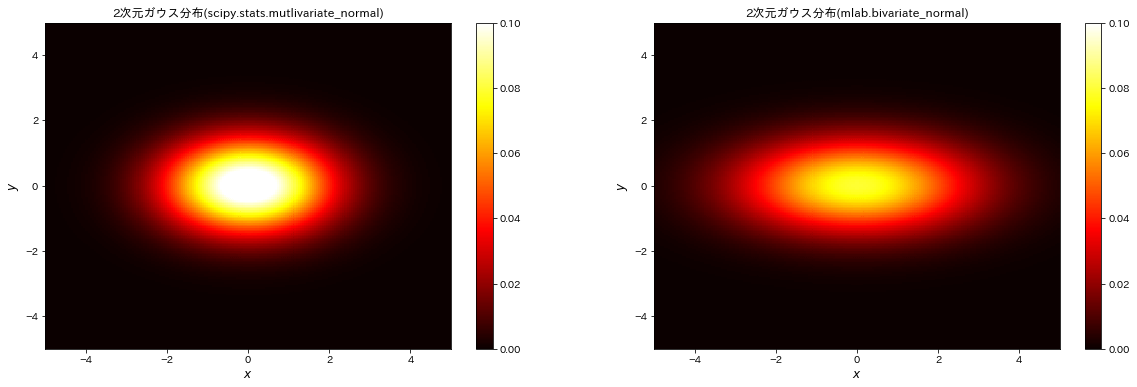

In [8]:
# ヒートマップを描画
plt.figure(figsize=(20, 6))

vrange = (0, 0.1)

# scipy.stats.mutlivariate_normal
plt.subplot(121)
plt.pcolor(X, Y, Z, cmap=plt.cm.hot, vmin=vrange[0], vmax=vrange[1])
plt.colorbar()
plt.title('2次元ガウス分布(scipy.stats.mutlivariate_normal)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)

plt.xlim((-5, 5))
plt.ylim((-5, 5))

# mlab.bivariate_normal
plt.subplot(122)
plt.pcolor(X, Y, Z_mlab, cmap=plt.cm.hot, vmin=vrange[0], vmax=vrange[1])
plt.colorbar()
plt.title('2次元ガウス分布(mlab.bivariate_normal)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)

plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.savefig('heatmap_2D_gaussian.png', bbox_inches='tight')
plt.show()


### ⇒ scipy.stats.multivariate_normal と mlab.bivariate_normal ではグラフの出力結果が微妙に異なっているように見える。

差の最大値：0.033
差の最小値：-0.014


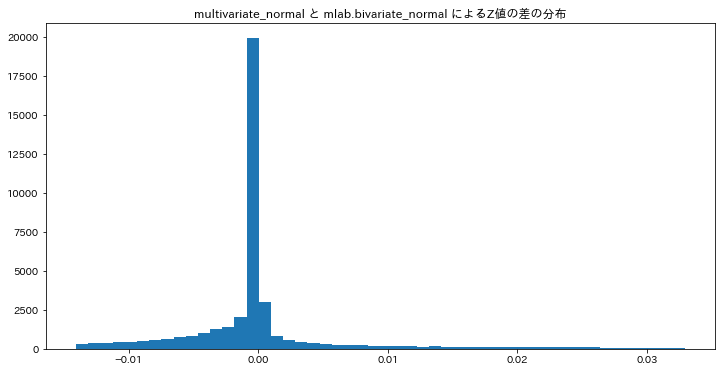

In [9]:
# scipy.stats.multivariate_normal.pdf との差の確認
diff = Z - Z_mlab
diff = diff.reshape((-1))

print(f'差の最大値：{np.max(diff):.3f}')
print(f'差の最小値：{np.min(diff):.3f}')

plt.figure(figsize=(12, 6))
plt.title('multivariate_normal と mlab.bivariate_normal によるZ値の差の分布')
plt.hist(diff, bins=50)
plt.show()

### ⇒ multivariate_normal と mlab.bivariate_normal によるZ値の差はほとんどゼロ。しかし最大で0.03程度の差分がある。

⇒ 計算精度の問題か？

### ※以下は scipy.stats.multivariate_normal のみ。

### 2次元ガウス分布の重ね合わせ

In [0]:
_Z = []

mu1 = [1., -1.]
cov1 = [[1., 0.], [0., 2.]]
rv1 = multivariate_normal(mu1, cov1)
Z1 = rv1.pdf(pos)

mu2 = [-1.5, -2.]
cov2 = [[1.5, 0.], [0., 1.5]]
rv2 = multivariate_normal(mu2, cov2)
Z2 = rv2.pdf(pos)

Z3 = (Z1 + Z2)/2

_Z.append(Z1)
_Z.append(Z2)
_Z.append(Z3)
_Z = np.array(_Z)

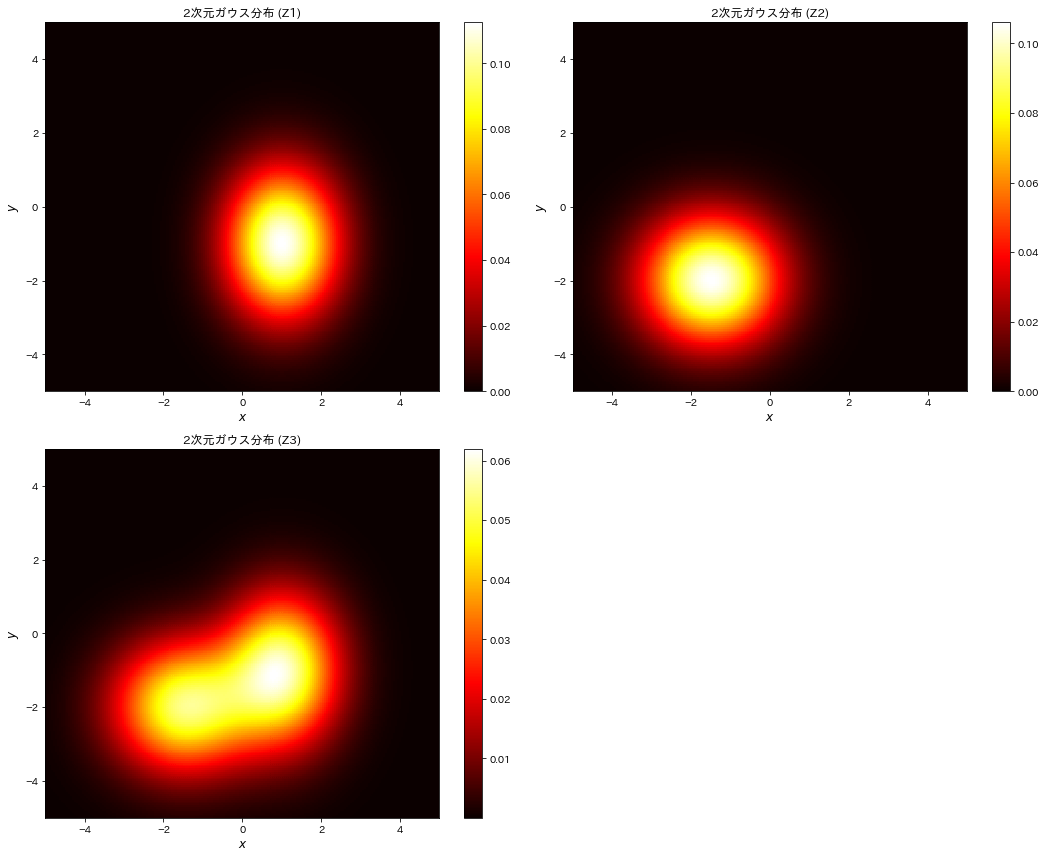

In [11]:
_titles = ['Z1', 'Z2', 'Z3']

# 描画
plt.figure(figsize=(15, 12))

for k in range(3):
    _title = _titles[k]
    plt.subplot(2, 2, (k+1))
    plt.pcolor(X, Y, _Z[k], cmap=plt.cm.hot)
    plt.colorbar()
    plt.title('2次元ガウス分布 ({})'.format(_title))
    plt.xlabel('$x$', size=12)
    plt.ylabel('$y$', size=12)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    
plt.tight_layout()
plt.show()


### ヒートマップと等高線

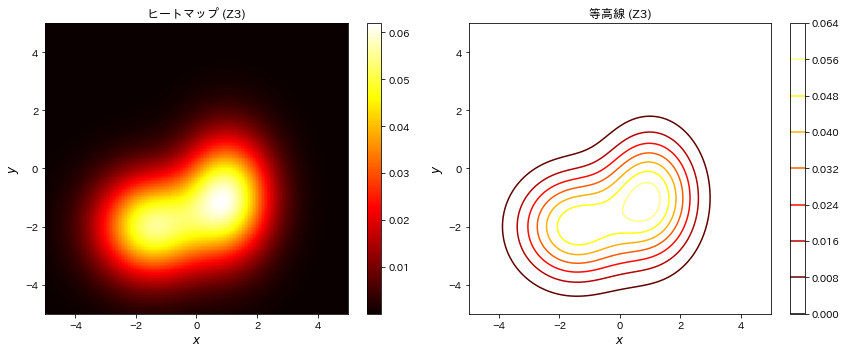

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.pcolor(X, Y, _Z[2], cmap=plt.cm.hot)
plt.colorbar()
plt.title('ヒートマップ (Z3)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.subplot(122)
plt.contour(X, Y, _Z[2], cmap=plt.cm.hot)
plt.colorbar()
plt.title('等高線 (Z3)')
plt.xlabel('$x$', size=12)
plt.ylabel('$y$', size=12)
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.tight_layout()
plt.savefig('heatmap_contour_2D_gaussian.png', bbox_inches='tight')
plt.show()

